In [15]:
%pylab nbagg
import sympy as sp
from matplotlib.pyplot import * 
%matplotlib inline
from IPython.display import set_matplotlib_formats 
set_matplotlib_formats('png', 'pdf')
from scipy.integrate import odeint

Populating the interactive namespace from numpy and matplotlib


/opt/conda/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['draw_if_interactive']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [16]:
def dy_dt(y, t, a, b, vw):
    y1, y2, y3, y4 = y
    dydt = [y2, b*(y2+vw)*sqrt((y2+vw)**2+y4**2), y4, a+b*y4*sqrt((y2+vw)**2+y4**2)] 
    return dydt


In [17]:
Cd = 0.47 
r = 0.2
m=100 
A = pi*r**2 
rhoa = 1
g = 9.8
c2 = 0.5*Cd*rhoa*A

t_start = 0.
t_end = 150. #this end is edited to fit the problem. 

nt = 10000 
t = linspace(t_start, t_end, nt)

In [18]:
a = -g
b = -c2/m
vw = 60 # wind's speed in mph
fac = (1000./3600.)*1.6 #This is so we can transform mph to kph because apparently 
#this question needed to use a whole slew of units....
y0 = [0.0, 0.0, 50000/3, 0.0]
def plane(vp): 
    y0[1] = vp
    sol = odeint(dy_dt, y0, t, args=(a, b, vw))
    return sol
def x_distance(vp): 
    sol = plane(vp)
    h = sol[1,2] 
    k=0
    while h > 0.:
        k += 1
        h = sol[k,2]
    return sol[k, 0], k

In [21]:
def v_plane(target):
    '''Iterates through different initial velocities
    until dx is within a range'''
    vp = 0.0
    dx, st = x_distance(vp) 
    while dx < target:
        vp += 0.25
        dx, st = x_distance(vp) 
    return vp, st

In [24]:
vp, st = v_plane(0)


print('The plane must be going ',  vp ,'kph in order to have the bomb drop precisely below where it was dropped')

384.5
The plane must be going  384.5 kph in order to have the bomb drop precisely below where it was dropped


b) Plot of Bomb's Trajectory


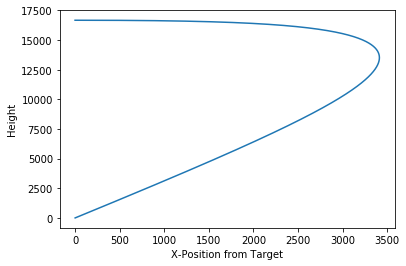

In [26]:
sol = plane(vp)

print("b) Plot of Bomb's Trajectory")
plot(sol[0:st, 0], sol[0:st, 2])
xlabel("X-Position from Target")
ylabel("Height")
show()

In [ ]:
##The reason that the equation becomes linear when heading backwards is because it reaches it's terminal 
##velocity in the y direction.  This is when the air dominates the horizontal velocity the bomb once had from the 
##plane, which is at the same time that the verticle drag of the bomb becomes equal to the gravitational force 
##felt on the bomb. 